In [1]:
# The missing values can be replaced using the following techniques: 
#    • Mean value 
#    • Median value 
#    • Mode (most frequent) 
#    • Constant value
# The goal is to find out which is a better measure of the central tendency of data and use that value for replacing missing 
# values appropriately.

# Plots such as box plots and distribution plots come very handily in deciding which techniques to use. You can use the 
# different plots such as box and distribution plots.

# You may note that the data is skewed. There are several or large numbers of data points that act as outliers 
# Outliers data points will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the missing values. 
# For symmetric data distribution, one can use the mean value for imputing missing values. 

# Impute / Replace Missing Values with Mean
#    The missing values are replaced with the mean value of the entire feature column 
#    If the data points are skewed not recommended.
#    Note that imputing missing data with mean values can only be done with numerical data. 
# Impute / Replace Missing Values with Median
#    The missing values are replaced with the median value of the entire feature column. 
#    When the data is skewed, it is good to consider using the median value for replacing the missing values 
#    Note that imputing missing data with median value can only be done with numerical data. 
# Impute / Replace Missing Values with Mode
#    The missing values are replaced with the mode value or most frequent value of the entire feature column. 
#    When the data is skewed, it is good to consider using mode values for replacing the missing values. 
#    Note that imputing missing data with mode values can be done with numerical and categorical data. 

### Impute / Replace Missing Values with Mean

#### The missing values are replaced with the mean value of the entire feature column. 
#### If the data points are skewed not recommended.
#### Note that imputing missing data with mean values can only be done with numerical data. 

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### Impute / Replace Missing Values with Median
#### The missing values are replaced with the median value of the entire feature column. 
#### When the data is skewed, it is good to consider using the median value for replacing the missing values 
#### Note that imputing missing data with median value can only be done with numerical data. 
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Impute / Replace Missing Values with Mode
#### The missing values are replaced with the mode value or most frequent value of the entire feature column When the data is skewed, it is good to consider using mode values for replacing the missing values 
#### Note that imputing missing data with mode values can be done with numerical and categorical data. 
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### Collecting Data

In [3]:
df = pd.read_csv(r"C:\Users\Mr.MACHINE\Videos\Captures\DATA SCIENCE\PRACTICE\Data PreProcessing\3.Handling Missing Value\WineQuality.csv")

#### Display First 5 records of data

In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Cheking Shape of the Dataset.  i.e. how many rows and Column in a Dataset.

In [5]:
df.shape

(6497, 13)

#### Lets check the columnwise non null values and the datatype of features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


#### Calculating NullValues of each Features

In [7]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
#### Visualizing the Features and check the skewness and outlier's

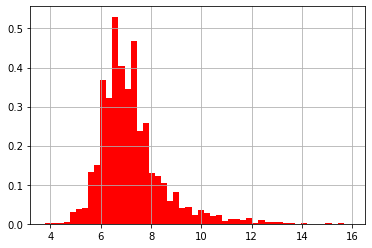

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
df["fixed acidity"].hist(bins=50,ax=ax, density=True, color='red')
plt.show()

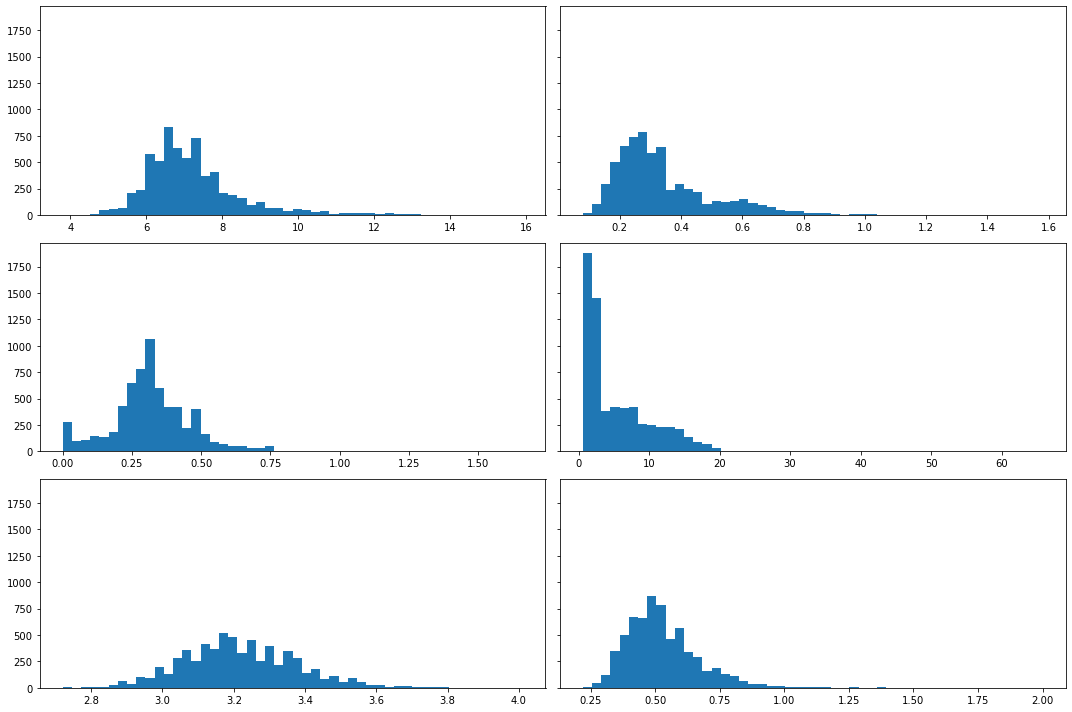

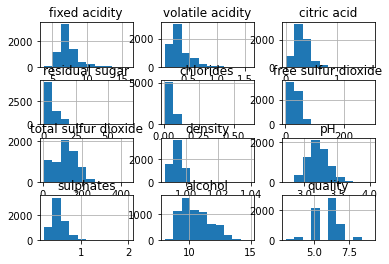

In [10]:
fig, axs = plt.subplots(3, 2, sharey=True, tight_layout=True,figsize = (15,10))
axs[0,0].hist(df["fixed acidity"], bins=50)
axs[0,1].hist(df["volatile acidity"], bins=50)
axs[1,0].hist(df["citric acid"], bins=50)
axs[1,1].hist(df["residual sugar"], bins=50)
axs[2,0].hist(df["pH"], bins=50)
axs[2,1].hist(df["sulphates"], bins=50)
df.hist()
plt.show()

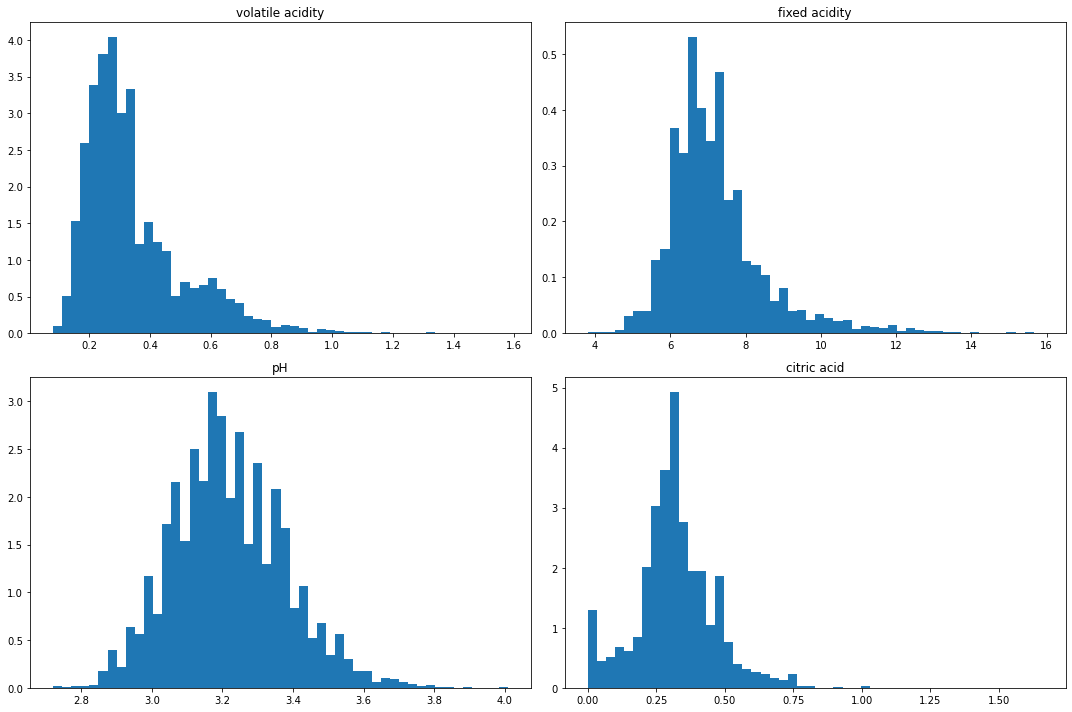

In [11]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2,figsize = (15,10) )

ax0.hist(df["volatile acidity"], bins=50, density=True, histtype='bar')
ax0.set_title('volatile acidity')

ax1.hist(df["fixed acidity"], bins=50, density=True, histtype='bar')
ax1.set_title('fixed acidity')

ax2.hist(df["pH"], bins=50, density=True, histtype='bar')
ax2.set_title('pH')

ax3.hist(df["citric acid"],bins=50, density=True, histtype='bar')
ax3.set_title('citric acid')

fig.tight_layout()
plt.show()

In [12]:
import seaborn as sns

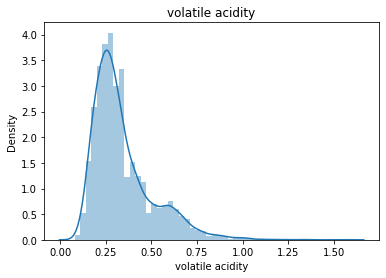

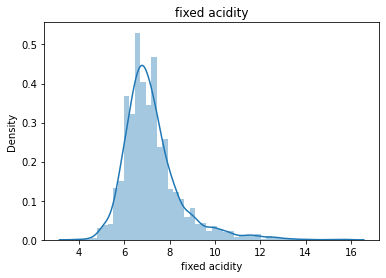

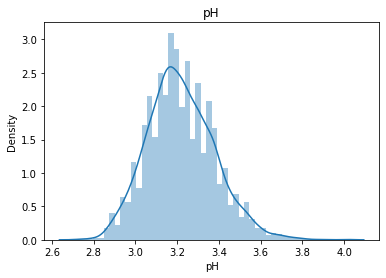

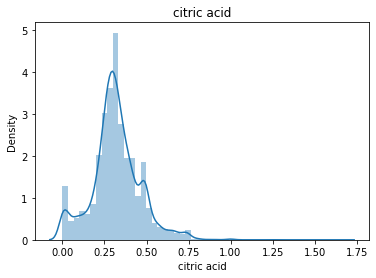

In [13]:
sns.distplot(df['volatile acidity'])
plt.title('volatile acidity')
plt.show()

sns.distplot(df['fixed acidity'])
plt.title('fixed acidity')
plt.show()

sns.distplot(df["pH"])
plt.title('pH')
plt.show()

sns.distplot(df["citric acid"])
plt.title("citric acid")
plt.show()

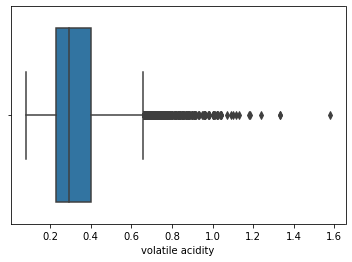

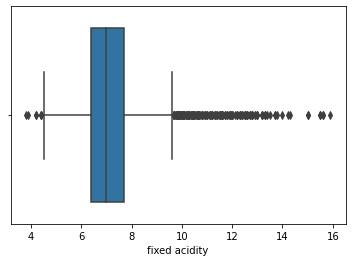

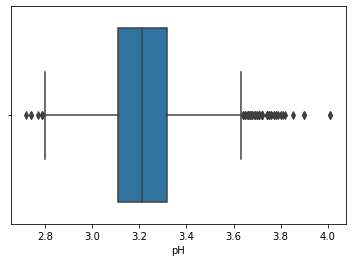

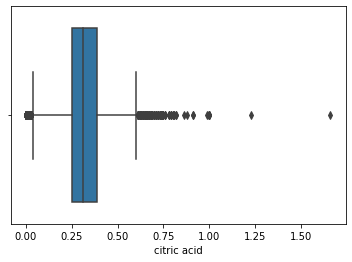

In [14]:
sns.boxplot( x=df["volatile acidity"] )
plt.show()
sns.boxplot( x=df["fixed acidity"] )
plt.show()
sns.boxplot( x=df["pH"] )
plt.show()
sns.boxplot( x=df["citric acid"] )
plt.show()

#### Note: 
####       df["volatile acidity"] datapoints are skewed. So we "Mean" imputation is not recommended.
####       df["fixed acidity","citric acid","pH"] are in symmetric distribution.
####       The data points have outliers. If outlier in a Features" mean" imputation is not recommended.
####       So we go with median/mode imputation

In [15]:
df1 = pd.read_csv(r"C:\Users\Mr.MACHINE\Videos\Captures\DATA SCIENCE\PRACTICE\Data PreProcessing\3.Handling Missing Value\WineQuality.csv")

In [16]:
df1.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

#### Imputation sklearn library

In [17]:
from sklearn.impute import SimpleImputer

#### Let's Try with mean imputation

In [18]:
mean_imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

In [19]:
df1["fixed acidity"] = mean_imputer.fit_transform(df1["fixed acidity"].values.reshape(-1,1))[:,0]

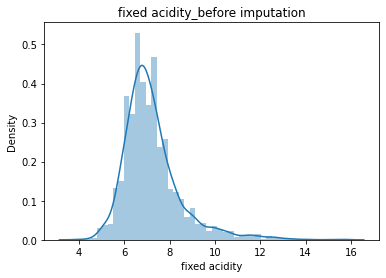

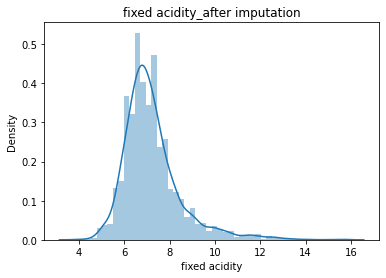

In [20]:
sns.distplot(df['fixed acidity'])
plt.title('fixed acidity_before imputation')
plt.show()

sns.distplot(df1['fixed acidity'])
plt.title('fixed acidity_after imputation')
plt.show()

In [21]:
df1['volatile acidity'] = mean_imputer.fit_transform(df1['volatile acidity'].values.reshape(-1,1))[:,0]

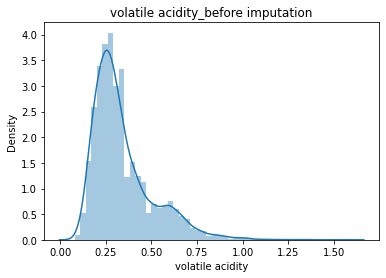

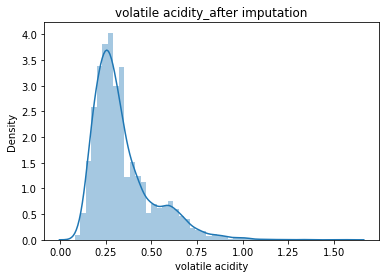

In [22]:
sns.distplot(df['volatile acidity'])
plt.title('volatile acidity_before imputation')
plt.show()

sns.distplot(df1['volatile acidity'])
plt.title('volatile acidity_after imputation')
plt.show()

In [23]:
df1['pH'] = mean_imputer.fit_transform(df1['pH'].values.reshape(-1,1))[:,0]

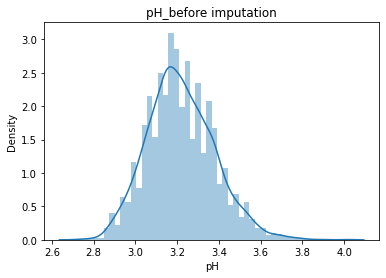

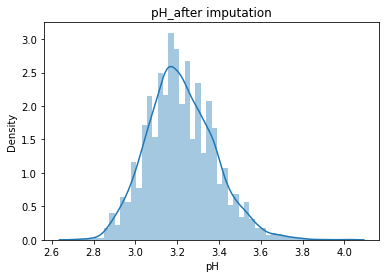

In [24]:
sns.distplot(df['pH'])
plt.title('pH_before imputation')
plt.show()

sns.distplot(df1['pH'])
plt.title('pH_after imputation')
plt.show()

In [25]:
df1['citric acid'] = mean_imputer.fit_transform(df1['citric acid'].values.reshape(-1,1))[:,0]
df1['residual sugar'] = mean_imputer.fit_transform(df1['residual sugar'].values.reshape(-1,1))[:,0]
df1['chlorides'] = mean_imputer.fit_transform(df1['chlorides'].values.reshape(-1,1))[:,0]
df1['sulphates'] = mean_imputer.fit_transform(df1['residual sugar'].values.reshape(-1,1))[:,0]

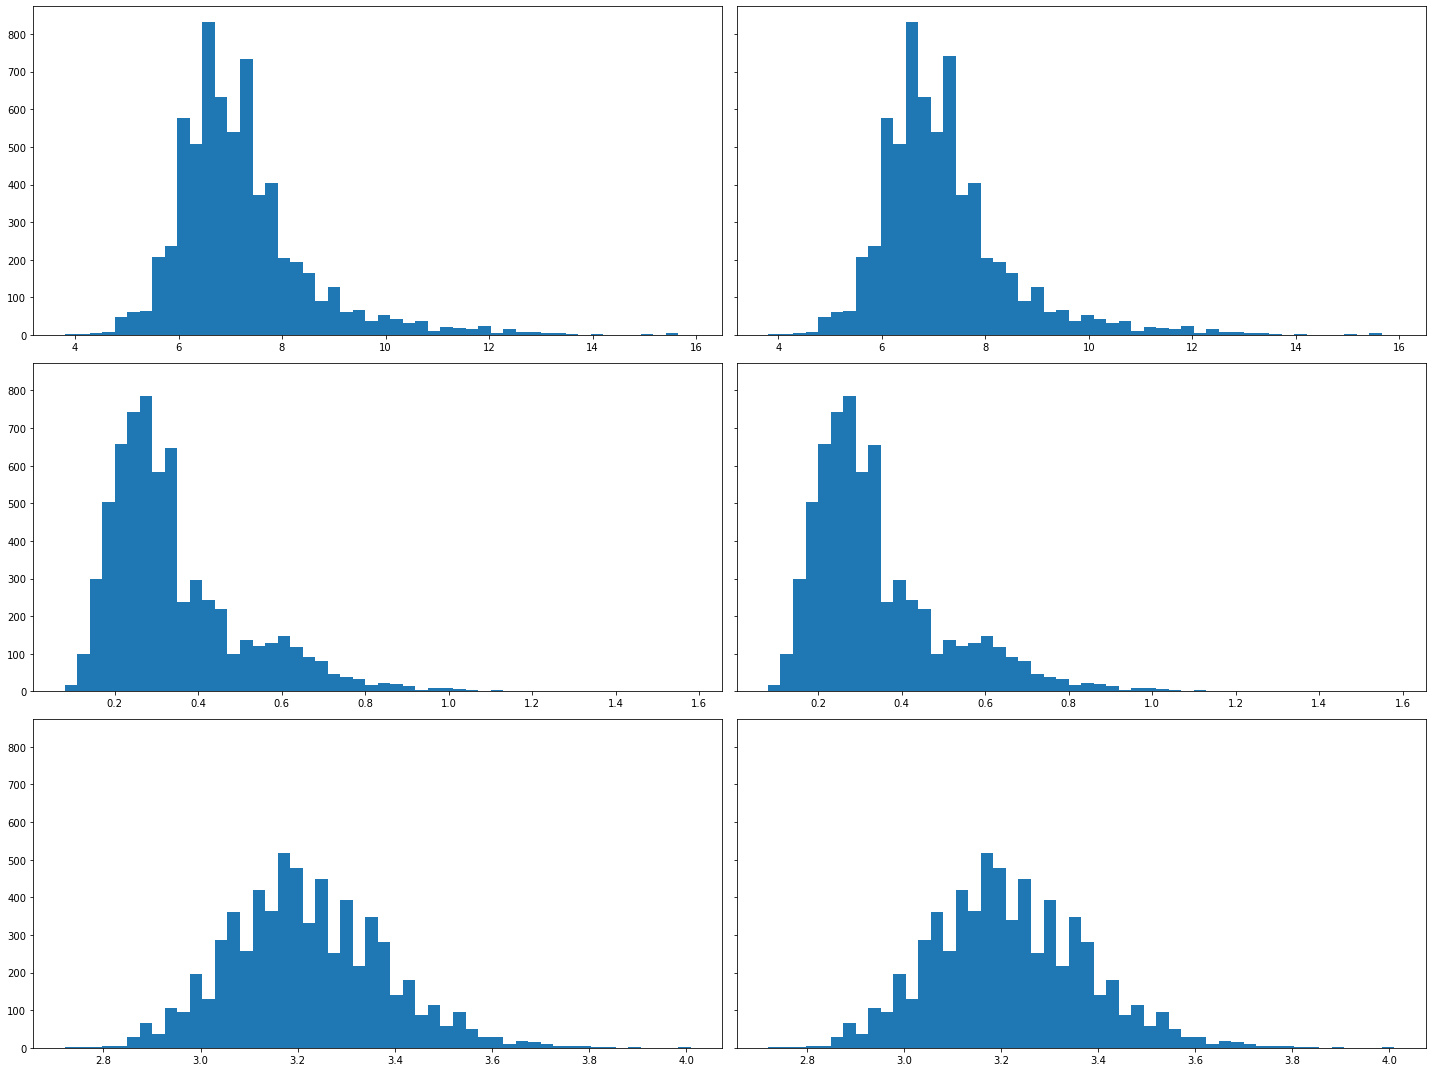

In [26]:
fig, axs = plt.subplots(3, 2, sharey=True, tight_layout=True,figsize = (20,15))
axs[0,0].hist(df["fixed acidity"], bins=50)
axs[0,1].hist(df1["fixed acidity"], bins=50)
axs[1,0].hist(df["volatile acidity"], bins=50)
axs[1,1].hist(df1["volatile acidity"], bins=50)
axs[2,0].hist(df["pH"], bins=50)
axs[2,1].hist(df1["pH"], bins=50)
plt.show()

In [27]:
df1.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Here we did the mean imputation, When the datasets are have a skewness and outliers mean imputation is not recommended.
#### But here, the missing values are very less. So the mean imputation is does not impact.If the dataset have more missing values and outliers mean impution will impact the ML model.

#### Median Imputation

In [28]:
df2 = pd.read_csv(r"C:\Users\Mr.MACHINE\Videos\Captures\DATA SCIENCE\PRACTICE\Data PreProcessing\3.Handling Missing Value\WineQuality.csv")

In [29]:
df2.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [30]:
median_imputer = SimpleImputer(missing_values=np.NaN, strategy='median')

In [31]:
df2["fixed acidity"] = median_imputer.fit_transform(df2["fixed acidity"].values.reshape(-1,1))[:,0]

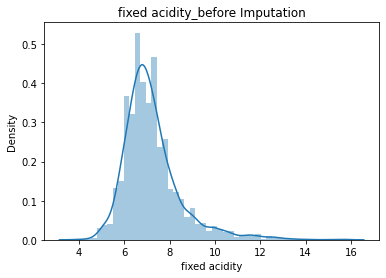

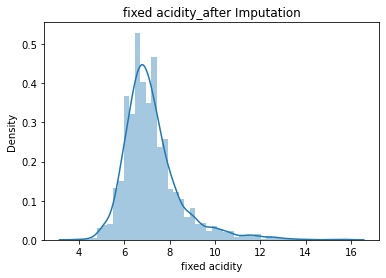

In [32]:
sns.distplot(df2['fixed acidity'])
plt.title('fixed acidity_before Imputation')
plt.show()

sns.distplot(df2['fixed acidity'])
plt.title('fixed acidity_after Imputation')
plt.show()

In [33]:
df2['volatile acidity'] = median_imputer.fit_transform(df2['volatile acidity'].values.reshape(-1,1))[:,0]

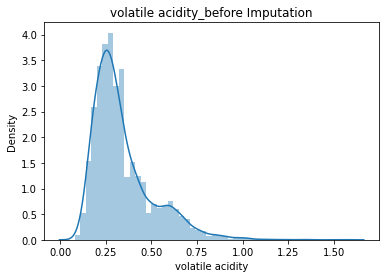

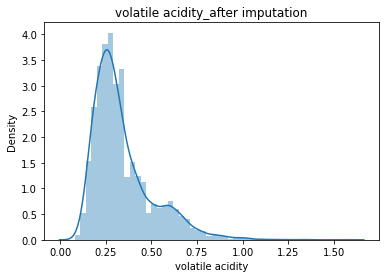

In [34]:
sns.distplot(df['volatile acidity'])
plt.title('volatile acidity_before Imputation')
plt.show()

sns.distplot(df2['volatile acidity'])
plt.title('volatile acidity_after imputation')
plt.show()

In [35]:
df2['pH'] = median_imputer.fit_transform(df2['pH'].values.reshape(-1,1))[:,0]

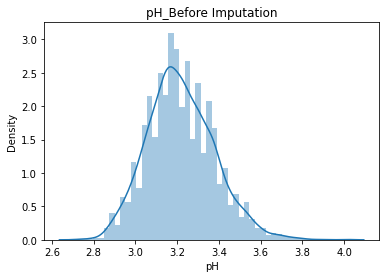

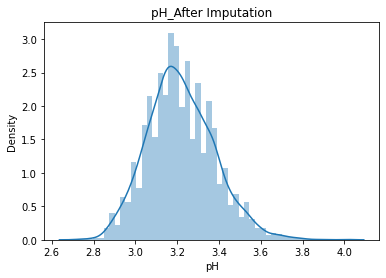

In [36]:
sns.distplot(df['pH'])
plt.title('pH_Before Imputation')
plt.show()

sns.distplot(df2['pH'])
plt.title('pH_After Imputation')
plt.show()

In [37]:
df2['citric acid'] = median_imputer.fit_transform(df2['citric acid'].values.reshape(-1,1))[:,0]
df2['residual sugar'] = median_imputer.fit_transform(df2['residual sugar'].values.reshape(-1,1))[:,0]
df2['chlorides'] = median_imputer.fit_transform(df2['chlorides'].values.reshape(-1,1))[:,0]
df2['sulphates'] = median_imputer.fit_transform(df2['residual sugar'].values.reshape(-1,1))[:,0]

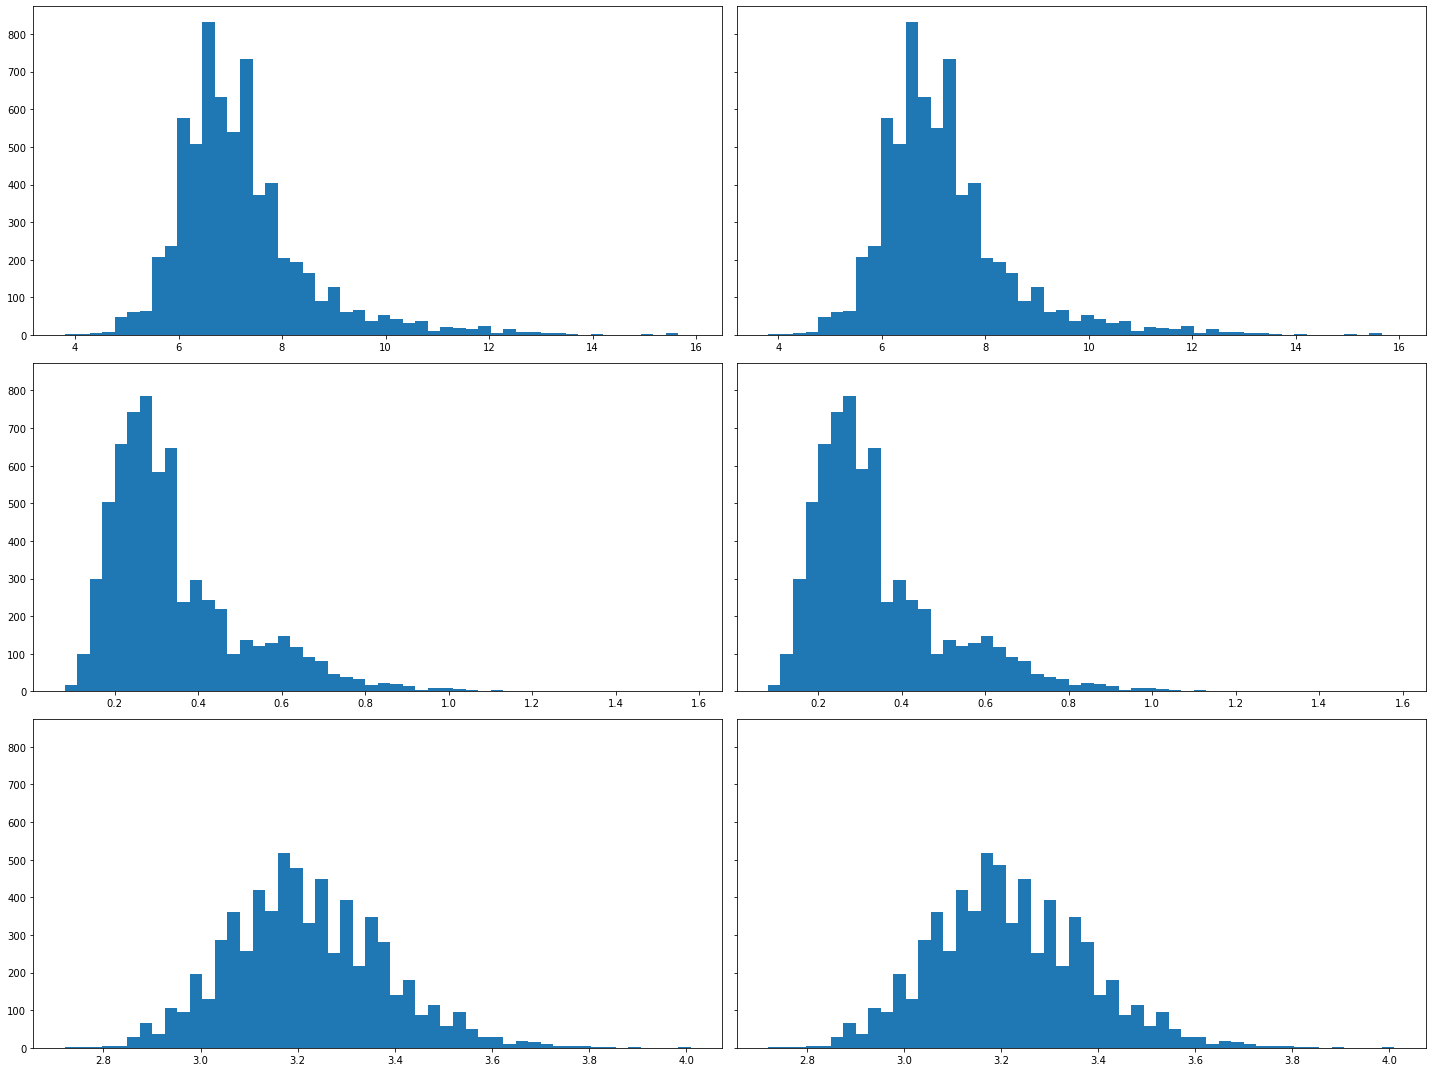

In [38]:
fig, axs = plt.subplots(3, 2, sharey=True, tight_layout=True,figsize = (20,15))
axs[0,0].hist(df["fixed acidity"], bins=50)
axs[0,1].hist(df2["fixed acidity"], bins=50)
axs[1,0].hist(df["volatile acidity"], bins=50)
axs[1,1].hist(df2["volatile acidity"], bins=50)
axs[2,0].hist(df["pH"], bins=50)
axs[2,1].hist(df2["pH"], bins=50)
plt.show()

#### Mode Imputation

In [39]:
df3 = pd.read_csv(r"C:\Users\Mr.MACHINE\Videos\Captures\DATA SCIENCE\PRACTICE\Data PreProcessing\3.Handling Missing Value\WineQuality.csv")

In [40]:
df3.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [41]:
mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

In [42]:
df3["fixed acidity"] = mode_imputer.fit_transform(df3["fixed acidity"].values.reshape(-1,1))[:,0]

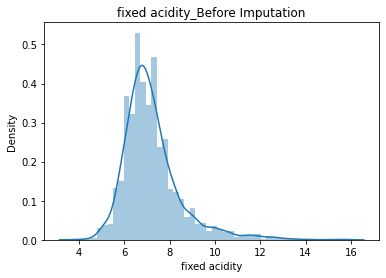

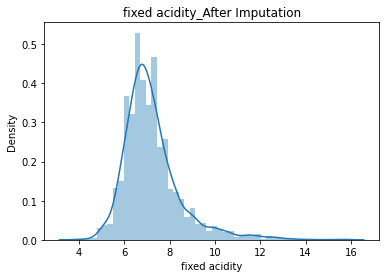

In [43]:
sns.distplot(df['fixed acidity'])
plt.title('fixed acidity_Before Imputation')
plt.show()

sns.distplot(df3['fixed acidity'])
plt.title('fixed acidity_After Imputation')
plt.show()

In [44]:
df3['volatile acidity'] = mode_imputer.fit_transform(df3['volatile acidity'].values.reshape(-1,1))[:,0]

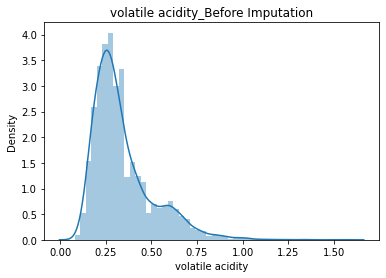

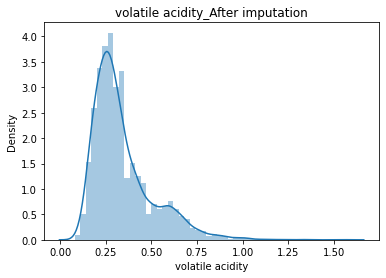

In [45]:
sns.distplot(df['volatile acidity'])
plt.title('volatile acidity_Before Imputation')
plt.show()

sns.distplot(df3['volatile acidity'])
plt.title('volatile acidity_After imputation')
plt.show()

In [46]:
df3['pH'] = mode_imputer.fit_transform(df3['pH'].values.reshape(-1,1))[:,0]

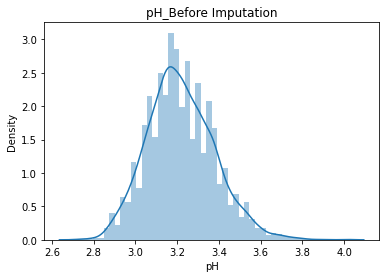

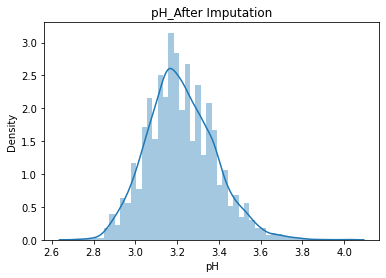

In [47]:
sns.distplot(df['pH'])
plt.title('pH_Before Imputation')
plt.show()

sns.distplot(df3['pH'])
plt.title('pH_After Imputation')
plt.show()

In [48]:
df3['citric acid'] = mode_imputer.fit_transform(df2['citric acid'].values.reshape(-1,1))[:,0]
df3['residual sugar'] = mode_imputer.fit_transform(df2['residual sugar'].values.reshape(-1,1))[:,0]
df3['chlorides'] = mode_imputer.fit_transform(df2['chlorides'].values.reshape(-1,1))[:,0]
df3['sulphates'] = mode_imputer.fit_transform(df2['residual sugar'].values.reshape(-1,1))[:,0]

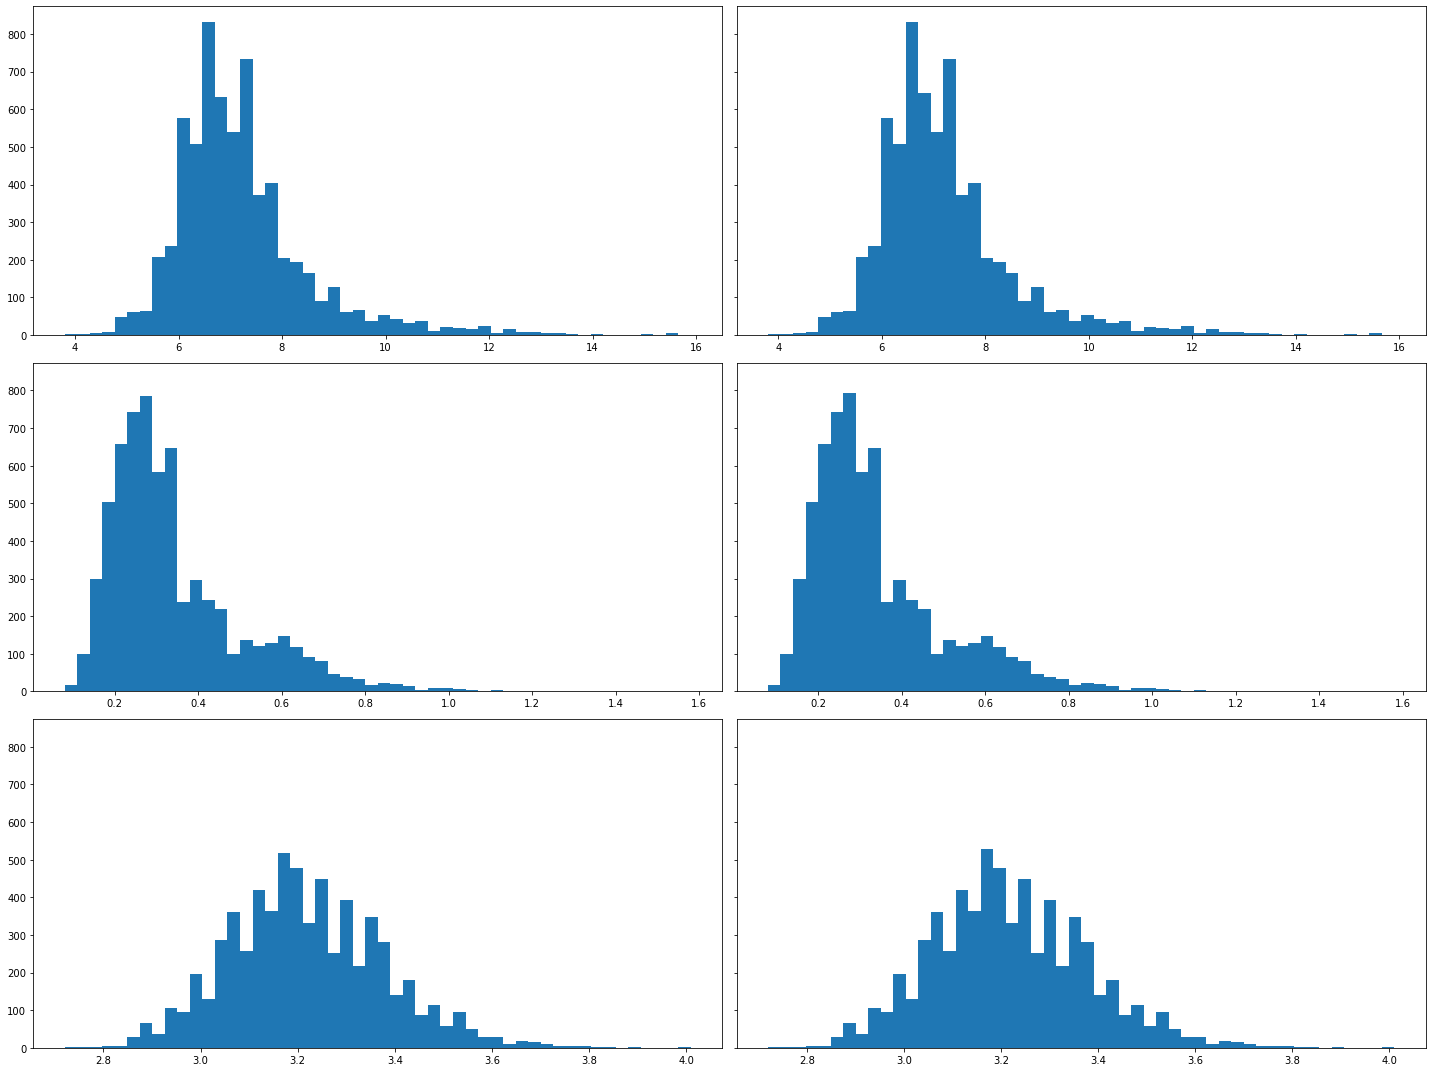

In [49]:
fig, axs = plt.subplots(3, 2, sharey=True, tight_layout=True,figsize = (20,15))
axs[0,0].hist(df["fixed acidity"], bins=50)
axs[0,1].hist(df3["fixed acidity"], bins=50)
axs[1,0].hist(df["volatile acidity"], bins=50)
axs[1,1].hist(df3["volatile acidity"], bins=50)
axs[2,0].hist(df["pH"], bins=50)
axs[2,1].hist(df3["pH"], bins=50)
plt.show()

## Using feature-engine library

In [50]:
from feature_engine.imputation import MeanMedianImputer

In [51]:
df4 = pd.read_csv(r"C:\Users\Mr.MACHINE\Videos\Captures\DATA SCIENCE\PRACTICE\Data PreProcessing\3.Handling Missing Value\WineQuality.csv")

#### Mean Imputation

In [52]:
mean_imputer = MeanMedianImputer(imputation_method='mean')

In [53]:
df4 = mean_imputer.fit_transform(df4)

In [54]:
df4.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Median Imputer

In [55]:
df5 = pd.read_csv(r"C:\Users\Mr.MACHINE\Videos\Captures\DATA SCIENCE\PRACTICE\Data PreProcessing\3.Handling Missing Value\WineQuality.csv")

In [56]:
median_imputer = MeanMedianImputer(imputation_method='median')

In [57]:
df5 = median_imputer.fit_transform(df5)

In [58]:
df5.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64